<h2 align="center"> Лабораторна робота №4</h2>
<h3 align='center'>Структури для роботи з великими обсягами даних в Python</h3>
<p align="center">ФБ-23 Ткачук Андрій</p>

<b>Мета:</b> отримати навички роботи із структурами для зберігання в Python (python, numpy, pandas, numpy array, dataframe, timeit) 

<b>Основні поняття:</b> numpy масиви, кортежі, списки, фрейми, профілювання.

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

# Перша частина

## dataframe

Завантажу dataframe з наданого посилання

In [47]:
def createdf():
    FilePath='household_power_consumption.txt'
    df=pd.read_csv(FilePath,sep=';',header=0)
    df.replace("?",np.nan, inplace=True)
    
    #Змінюю тип даних
    df[['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']]=df[['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']].astype(float)
    df['Date']=pd.to_datetime(df['Date'])
    #Змінюю Nan та '?'
    df=df.interpolate()


    return df



### 1. Обрати всі домогосподарства, у яких загальна активна споживана потужність перевищує 5 кВт.
### 2. Обрати всі домогосподарства, у яких вольтаж перевищую 235 В.

In [48]:
df=createdf()
%time df_ex1=df[df['Global_active_power']>5]
%time df_ex2=df[df['Voltage']>235]
print(f"загальна активна споживана потужність перевищує 5 кВт:\n{df_ex1}")
print(f"вольтаж перевищує 235 В:\n{df_ex2}")


CPU times: total: 0 ns
Wall time: 6 ms
CPU times: total: 109 ms
Wall time: 108 ms
загальна активна споживана потужність перевищує 5 кВт:
              Date      Time  Global_active_power  Global_reactive_power  \
1       2006-12-16  17:25:00                5.360                  0.436   
2       2006-12-16  17:26:00                5.374                  0.498   
3       2006-12-16  17:27:00                5.388                  0.502   
11      2006-12-16  17:35:00                5.412                  0.470   
12      2006-12-16  17:36:00                5.224                  0.478   
...            ...       ...                  ...                    ...   
2069356 2010-11-22  18:40:00                5.408                  0.150   
2069357 2010-11-22  18:41:00                5.528                  0.144   
2071586 2010-11-24  07:50:00                5.172                  0.050   
2071587 2010-11-24  07:51:00                5.750                  0.000   
2072997 2010-11-25  07:21:0

### 3. Обрати всі домогосподарства, у яких сила струму лежить в межах 19-20 А, для них виявити ті, у яких пральна машина та холодильних споживають більше, ніж бойлер та кондиціонер.

In [49]:
%time df_ex3=df[(df['Global_intensity'].between(19,20))& (df['Sub_metering_2']>df['Sub_metering_3'])]
print(df_ex3)

CPU times: total: 15.6 ms
Wall time: 11 ms
              Date      Time  Global_active_power  Global_reactive_power  \
45      2006-12-16  18:09:00                4.464                  0.136   
460     2006-12-17  01:04:00                4.582                  0.258   
464     2006-12-17  01:08:00                4.618                  0.104   
475     2006-12-17  01:19:00                4.636                  0.140   
476     2006-12-17  01:20:00                4.634                  0.152   
...            ...       ...                  ...                    ...   
2071589 2010-11-24  07:53:00                4.666                  0.000   
2071590 2010-11-24  07:54:00                4.694                  0.000   
2071591 2010-11-24  07:55:00                4.602                  0.000   
2071592 2010-11-24  07:56:00                4.536                  0.000   
2071593 2010-11-24  07:57:00                4.626                  0.000   

         Voltage  Global_intensity  Sub_mete

### 4. Обрати випадковим чином 500000 домогосподарств (без повторів елементів вибірки), для них обчислити середні величини усіх 3-х груп споживання електричної енергії, а також 


In [50]:
%%time 
df_ex4=df.sample(n=500000)
sm1=df_ex4['Sub_metering_1'].mean()
sm2=df_ex4['Sub_metering_2'].mean()
sm3=df_ex4['Sub_metering_3'].mean()
print(f"Середнє значення Sub_metering_1: {sm1}")
print(f"Середнє значення Sub_metering_2: {sm2}")
print(f"Середнє значення Sub_metering_3: {sm3}")
print('\n\n')
print(df_ex4)



Середнє значення Sub_metering_1: 1.1137305322683704
Середнє значення Sub_metering_2: 1.2900822467479542
Середнє значення Sub_metering_3: 6.437402492672343



              Date      Time  Global_active_power  Global_reactive_power  \
1839153 2010-06-15  21:57:00                1.070                  0.094   
895810  2008-08-29  19:34:00                0.080                  0.000   
1952833 2010-09-02  20:37:00                3.070                  0.242   
395967  2007-09-17  16:51:00                0.210                  0.104   
1749763 2010-04-14  20:07:00                2.030                  0.222   
...            ...       ...                  ...                    ...   
794505  2008-06-20  11:09:00                1.202                  0.000   
1714974 2010-03-21  16:18:00                3.608                  0.000   
258443  2007-06-14  04:47:00                0.102                  0.000   
1078846 2009-01-03  22:10:00                3.796                  0.076   
168338

### 5. Обрати ті домогосподарства, які після 18-00 споживають понад 6 кВт за хвилину в середньому, серед відібраних визначити ті, у яких основне споживання електроенергії у вказаний проміжок часу припадає на пральну машину, сушарку, холодильник та освітлення (група 2 є найбільшою), а потім обрати кожен третій результат із першої половини та кожен четвертий результат із другої половини.

In [51]:
%%time 
df_ex5=df_ex4[(df_ex4['Time']>'18:00:00') & (df_ex4['Global_active_power']>6) & (df_ex4['Sub_metering_2'].gt(df_ex4['Sub_metering_1'],df_ex4['Sub_metering_3']))]
fh=df_ex5.iloc[:len(df_ex5) // 2]
sh=df_ex5.iloc[len(df_ex5) // 2:]
res=pd.concat([fh.iloc[2::3],sh.iloc[3::4]])
print('df_ex5.head(10)')
print(df_ex5.head(10))
print('\n\n')
print('res.head(10)')
print(res.head(10))
print('\n\n')
print('df_ex5.tail(10)')
print(df_ex5.tail(10))
print('\n\n')
print('res.tail(10)')
print(res.tail(10))

df_ex5.head(10)
              Date      Time  Global_active_power  Global_reactive_power  \
1775626 2010-05-02  19:10:00                7.330                  0.000   
476836  2007-11-12  20:40:00                6.914                  0.250   
1228528 2009-04-17  20:52:00                6.914                  0.092   
1222767 2009-04-13  20:51:00                6.030                  0.176   
1621645 2010-01-15  20:49:00                9.098                  0.490   
1019610 2008-11-23  18:54:00                6.614                  0.384   
1621661 2010-01-15  21:05:00                6.046                  0.240   
1314782 2009-06-16  18:26:00                6.170                  0.088   
813855  2008-07-03  21:39:00                6.160                  0.000   
813852  2008-07-03  21:36:00                6.302                  0.000   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
1775626   232.51              31.6            27.0            72.0   
476836 

## numpy array

Створюю numpy array з dataframe

In [52]:
def createdf():
    FilePath='household_power_consumption.txt'
    df=pd.read_csv(FilePath,sep=';',header=0)
    df.replace("?",np.nan, inplace=True)
    
    #Змінюю тип даних
    df[['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']]=df[['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']].astype(float)
    #Змінюю Nan та '?'
    df=df.interpolate()


    return df

df=createdf()
datanp=df.to_numpy()
print(datanp[:5])
print(datanp.shape)
print(type(datanp))

[['16/12/2006' '17:24:00' 4.216 0.418 234.84 18.4 0.0 1.0 17.0]
 ['16/12/2006' '17:25:00' 5.36 0.436 233.63 23.0 0.0 1.0 16.0]
 ['16/12/2006' '17:26:00' 5.374 0.498 233.29 23.0 0.0 2.0 17.0]
 ['16/12/2006' '17:27:00' 5.388 0.502 233.74 23.0 0.0 1.0 17.0]
 ['16/12/2006' '17:28:00' 3.666 0.528 235.68 15.8 0.0 1.0 17.0]]
(2075259, 9)
<class 'numpy.ndarray'>


### 1. Обрати всі домогосподарства, у яких загальна активна споживана потужність перевищує 5 кВт.

In [53]:
%%time
n_ex1=datanp[datanp[:,2]>5]
print(n_ex1)

[['16/12/2006' '17:25:00' 5.36 ... 0.0 1.0 16.0]
 ['16/12/2006' '17:26:00' 5.374 ... 0.0 2.0 17.0]
 ['16/12/2006' '17:27:00' 5.388 ... 0.0 1.0 17.0]
 ...
 ['24/11/2010' '07:50:00' 5.172 ... 0.0 38.0 17.0]
 ['24/11/2010' '07:51:00' 5.75 ... 0.0 39.0 17.0]
 ['25/11/2010' '07:21:00' 5.074 ... 1.0 2.0 18.0]]
CPU times: total: 78.1 ms
Wall time: 62 ms


### 2. Обрати всі домогосподарства, у яких вольтаж перевищую 235 В.

In [54]:
%%time
n_ex2=datanp[datanp[:,4]>235]
print(n_ex2[:5])

[['16/12/2006' '17:28:00' 3.666 0.528 235.68 15.8 0.0 1.0 17.0]
 ['16/12/2006' '17:29:00' 3.52 0.522 235.02 15.0 0.0 2.0 17.0]
 ['16/12/2006' '17:30:00' 3.702 0.52 235.09 15.8 0.0 1.0 17.0]
 ['16/12/2006' '17:31:00' 3.7 0.52 235.22 15.8 0.0 1.0 17.0]
 ['16/12/2006' '17:38:00' 4.054 0.422 235.24 17.6 0.0 1.0 17.0]]
CPU times: total: 297 ms
Wall time: 283 ms


### 3. Обрати всі домогосподарства, у яких сила струму лежить в межах 19-20 А, для них виявити ті, у яких пральна машина та холодильних споживають більше, ніж бойлер та кондиціонер.

In [55]:
%%time
n_ex3=datanp[(datanp[:,5]>19)&(datanp[:,5]<20)&(datanp[:,7]>datanp[:,6])]
print(n_ex3[:20])

[['16/12/2006' '17:34:00' 4.448 0.498 232.86 19.6 0.0 1.0 17.0]
 ['16/12/2006' '18:16:00' 4.524 0.076 234.2 19.6 0.0 9.0 17.0]
 ['16/12/2006' '18:18:00' 4.472 0.0 233.29 19.2 0.0 1.0 16.0]
 ['16/12/2006' '18:36:00' 4.536 0.0 233.54 19.4 0.0 1.0 17.0]
 ['17/12/2006' '01:04:00' 4.582 0.258 238.08 19.6 0.0 13.0 0.0]
 ['17/12/2006' '01:08:00' 4.618 0.104 239.61 19.6 0.0 27.0 0.0]
 ['17/12/2006' '01:19:00' 4.636 0.14 237.37 19.4 0.0 36.0 0.0]
 ['17/12/2006' '01:20:00' 4.634 0.152 237.17 19.4 0.0 35.0 0.0]
 ['17/12/2006' '01:21:00' 4.652 0.142 237.92 19.4 0.0 36.0 0.0]
 ['17/12/2006' '01:52:00' 4.622 0.24 239.59 19.2 0.0 37.0 0.0]
 ['17/12/2006' '10:55:00' 4.444 0.136 235.97 19.2 2.0 50.0 17.0]
 ['17/12/2006' '20:21:00' 4.464 0.388 233.9 19.4 0.0 1.0 17.0]
 ['17/12/2006' '20:22:00' 4.448 0.396 233.44 19.4 0.0 1.0 17.0]
 ['18/12/2006' '19:23:00' 4.642 0.4 233.62 19.8 0.0 36.0 0.0]
 ['18/12/2006' '19:24:00' 4.58 0.39 232.51 19.6 0.0 37.0 0.0]
 ['18/12/2006' '20:17:00' 4.516 0.0 232.91 19.4 0.0

### 4. Обрати випадковим чином 500000 домогосподарств (без повторів елементів вибірки), для них обчислити середні величини усіх 3-х груп споживання електричної енергії,

In [56]:
%%time
id_list=np.random.choice(datanp.shape[0],500000,replace=False)
# print(len(n_ex4))
# print(len(set(n_ex4)))
n_ex4=datanp[id_list]
n_sm1=np.mean(datanp[:,6])
n_sm2=np.mean(datanp[:,7])
n_sm3=np.mean(datanp[:,8])
print(n_ex4)
print(f"Середнє значення Sub_metering_1: {n_sm1}")
print(f"Середнє значення Sub_metering_2: {n_sm2}")
print(f"Середнє значення Sub_metering_3: {n_sm3}")


[['13/5/2009' '03:10:00' 0.346 ... 0.0 0.0 1.0]
 ['7/11/2010' '13:22:00' 1.13 ... 1.0 1.0 1.0]
 ['23/6/2010' '21:04:00' 4.868 ... 53.0 1.0 17.0]
 ...
 ['22/3/2010' '02:36:00' 0.37 ... 0.0 0.0 1.0]
 ['12/9/2009' '06:15:00' 0.306 ... 0.0 1.0 1.0]
 ['5/7/2009' '09:52:00' 3.794 ... 1.0 39.0 18.0]]
Середнє значення Sub_metering_1: 1.1094848883922441
Середнє значення Sub_metering_2: 1.2892291998251784
Середнє значення Sub_metering_3: 6.442385504652672
CPU times: total: 547 ms
Wall time: 544 ms


### 5. Обрати ті домогосподарства, які після 18-00 споживають понад 6 кВт за хвилину в середньому, серед відібраних визначити ті, у яких основне споживання електроенергії у вказаний проміжок часу припадає на пральну машину, сушарку, холодильник та освітлення (група 2 є найбільшою), а потім обрати кожен третій результат із першої половини та кожен четвертий результат із другої половини.

In [57]:
%%time
n_ex5=n_ex4[(n_ex4[:,1]>'18:00:00')&(n_ex4[:,2]>6)&(n_ex4[:,7]>n_ex4[:,6])&(n_ex4[:,7]>n_ex4[:,8])]
half_index = len(n_ex5) // 2
first_half = n_ex5[:half_index]
second_half = n_ex5[half_index:]

selected_elements = np.concatenate([first_half[2::3], second_half[3::4]])
print(n_ex5[:10])
print('\n')
print(selected_elements[:5])
print('\n')
print(n_ex5[-10:])
print('\n')
print(selected_elements[-4:])

[['4/3/2007' '19:44:00' 6.312 0.144 231.98 27.2 0.0 71.0 16.0]
 ['1/4/2007' '18:44:00' 6.428 0.266 232.81 27.6 1.0 72.0 16.0]
 ['9/12/2007' '19:20:00' 6.218 0.288 228.95 27.2 0.0 33.0 17.0]
 ['23/1/2010' '18:34:00' 6.238 0.602 233.61 26.8 0.0 35.0 28.0]
 ['10/1/2009' '19:52:00' 6.794 0.2 234.2 29.0 2.0 72.0 16.0]
 ['29/12/2006' '22:34:00' 6.238 0.268 235.12 26.4 0.0 73.0 17.0]
 ['2/2/2008' '19:48:00' 7.448 0.46 230.31 32.6 19.0 36.0 16.0]
 ['31/3/2009' '20:37:00' 6.454 0.0 233.61 27.6 0.0 71.0 17.0]
 ['30/11/2008' '20:15:00' 8.08 0.082 233.33 34.6 1.0 71.0 16.0]
 ['23/11/2008' '18:02:00' 7.558 0.352 230.56 32.8 0.0 35.0 16.0]]


[['9/12/2007' '19:20:00' 6.218 0.288 228.95 27.2 0.0 33.0 17.0]
 ['29/12/2006' '22:34:00' 6.238 0.268 235.12 26.4 0.0 73.0 17.0]
 ['30/11/2008' '20:15:00' 8.08 0.082 233.33 34.6 1.0 71.0 16.0]
 ['9/12/2007' '19:15:00' 6.284 0.31 230.04 27.2 0.0 34.0 16.0]
 ['20/3/2007' '21:44:00' 6.134 0.374 230.76 26.6 1.0 36.0 17.0]]


[['4/3/2007' '21:32:00' 6.918 0.0 233.6 

## Таблиця


<table>
    <tr>
        <td colspan=2>DataFrame</td>
        <td colspan=2>Numpy array</td>
    </tr>
    <tr>
        <td>Номер завдання:</td>
        <td>Швидкість,ms</td>
        <td>Номер завдання:</td>
        <td>Швидкість,ms</td>
    </tr>
    <tr>
        <td>1</td>
        <td>5</td>
        <td>1</td>
        <td>58</td>
    </tr>
        <tr>
        <td>2</td>
        <td>112</td>
        <td>2</td>
        <td>241</td>
    </tr>
        <tr>
        <td>3</td>
        <td>12</td>
        <td>3</td>
        <td>122</td>
    </tr>
        <tr>
        <td>4</td>
        <td>226</td>
        <td>4</td>
        <td>540</td>
    </tr>
        <tr>
        <td>5</td>
        <td>58</td>
        <td>5</td>
        <td>237</td>
    </tr>

</table>

<table>
    <tr>
        <td rowspan=2>Номер завдання:</td>
        <td>DataFrame</td>
        <td>Numpy array</td>
    </tr>
    <tr>
        <td colspan=2>Швидкість,ms</td>
    </tr>
    <tr>
        <td>1</td>
        <td>5</td>
        <td>58</td>
    </tr>
        <tr>
        <td>2</td>
        <td>112</td>
        <td>241</td>
    </tr>
        <tr>
        <td>3</td>
        <td>12</td>
        <td>122</td>
    </tr>
        <tr>
        <td>4</td>
        <td>226</td>
        <td>540</td>
    </tr>
        <tr>
        <td>5</td>
        <td>58</td>
        <td>237</td>
    </tr>

</table>

# Друга частина

## dataframe

In [58]:
%%time
df2=pd.read_excel("Vehicle.xlsx")
df2.drop(columns=['Vehicle_Years'], inplace=True)

print(df2.head(10))
print(df2.dtypes)


                      Vehicle_Model  Start_Year  End_Year Vehicle_Brand  \
0  REXTON RX270 SE CRD (163) ESTATE        2004    2007.0     SSANGYONG   
1  REXTON RX270 SX CRD (163) ESTATE        2004    2007.0     SSANGYONG   
2  REXTON RX270 SX CRD (163) ESTATE        2004    2007.0     SSANGYONG   
3   REXTON RX270 S CRD (163) ESTATE        2004    2007.0     SSANGYONG   
4   REXTON RX270 S CRD (163) ESTATE        2004    2007.0     SSANGYONG   
5           RODIUS 270 S CDI ESTATE        2005    2008.0     SSANGYONG   
6           RODIUS 270 S CDI ESTATE        2005    2008.0     SSANGYONG   
7          RODIUS 270 SE CDI ESTATE        2005    2008.0     SSANGYONG   
8          RODIUS 270 SX CDI ESTATE        2005    2008.0     SSANGYONG   
9          RODIUS 270 SX CDI ESTATE        2005    2008.0     SSANGYONG   

   Vehicle_Doors  Vehicle_Engine_CC Vehicle_Fuel  Vehicle_Length  \
0              5               2696       Diesel          4720.0   
1              5               2696   

### 1. Поборотися із зниклими даними.


In [59]:
print(f"Кількість зниклих даних: \n{df2.isnull().sum()}")

Кількість зниклих даних: 
Vehicle_Model                       0
Start_Year                          0
End_Year                         2967
Vehicle_Brand                       0
Vehicle_Doors                       0
Vehicle_Engine_CC                   0
Vehicle_Fuel                        0
Vehicle_Length                   2028
Vehicle_Maximum_Speed               0
Vehicle_MPG                      2028
Vehicle_Power                       0
Vehicle_Power_to_Weight_Ratio    2028
Vehicle_Transmission                0
Price                            3981
dtype: int64


#### 1.1 Зниклі дані в колонці End_Year

In [60]:
%%time
meangap=(df2['End_Year']-df2['Start_Year']).mean()
print(meangap)
print(df2[df2['Start_Year']==2008].head(2))
df2['End_Year']=df2['End_Year'].fillna(df2['Start_Year']+meangap).astype(int)
print(df2[df2['Start_Year']==2008].head(2))

2.324447296272531
           Vehicle_Model  Start_Year  End_Year Vehicle_Brand  Vehicle_Doors  \
17   RODIUS S CDI ESTATE        2008       NaN     SSANGYONG              5   
18  RODIUS ES CDI ESTATE        2008       NaN     SSANGYONG              5   

    Vehicle_Engine_CC Vehicle_Fuel  Vehicle_Length  Vehicle_Maximum_Speed  \
17               2696       Diesel          5125.0                    106   
18               2696       Diesel          5125.0                    105   

    Vehicle_MPG  Vehicle_Power  Vehicle_Power_to_Weight_Ratio  \
17         32.1          162.3                           74.4   
18         32.1          162.3                           74.4   

   Vehicle_Transmission    Price  
17               Manual      NaN  
18               Manual  280.895  
           Vehicle_Model  Start_Year  End_Year Vehicle_Brand  Vehicle_Doors  \
17   RODIUS S CDI ESTATE        2008      2010     SSANGYONG              5   
18  RODIUS ES CDI ESTATE        2008      2010     SS

#### 1.2 Зниклі дані в колонці Vehicle_Length, Vehicle_MPG, Vehicle_Power_to_Weight_Ratio

In [61]:
%%time
print('До зміни\n')
print(df2[df2['Vehicle_Length'].isnull()][['Vehicle_Model','Vehicle_Length','Vehicle_MPG','Vehicle_Power_to_Weight_Ratio']].head())
index=[8,12,30,37,39]
df2['Vehicle_Length']=df2['Vehicle_Length'].bfill()
df2['Vehicle_MPG']=df2['Vehicle_MPG'].bfill()
df2['Vehicle_Power_to_Weight_Ratio']=df2['Vehicle_Power_to_Weight_Ratio'].bfill()
print('\nПісля зміни\n')
print(df2.loc[index][['Vehicle_Model','Vehicle_Length','Vehicle_MPG','Vehicle_Power_to_Weight_Ratio']].head())

До зміни

               Vehicle_Model  Vehicle_Length  Vehicle_MPG  \
8   RODIUS 270 SX CDI ESTATE             NaN          NaN   
12        KYRON S CDI ESTATE             NaN          NaN   
30     KORANDO ES D20T (2WD)             NaN          NaN   
37     KORANDO SE D20T (2WD)             NaN          NaN   
39          KENARI EZ ESTATE             NaN          NaN   

    Vehicle_Power_to_Weight_Ratio  
8                             NaN  
12                            NaN  
30                            NaN  
37                            NaN  
39                            NaN  

Після зміни

               Vehicle_Model  Vehicle_Length  Vehicle_MPG  \
8   RODIUS 270 SX CDI ESTATE          5125.0         28.5   
12        KYRON S CDI ESTATE          4660.0         36.7   
30     KORANDO ES D20T (2WD)          4410.0         47.1   
37     KORANDO SE D20T (2WD)          3460.0         50.4   
39          KENARI EZ ESTATE          2500.0         55.4   

    Vehicle_Power_to_Weigh

### 1.3 Зниклі дані в колонці Price

In [62]:
%%time
print('До зміни\n')
print(df2[df2['Price'].isnull()][['Vehicle_Model','Price']].head())
index=[3,10,17,22,28]
df2['Price']=df2['Price'].interpolate()
print('\nПісля зміни\n')
print(df2.loc[index][['Vehicle_Model','Price']].head())

До зміни

                      Vehicle_Model  Price
3   REXTON RX270 S CRD (163) ESTATE    NaN
10         KYRON S (2WD) CDI ESTATE    NaN
17              RODIUS S CDI ESTATE    NaN
22    REXTON 270 SPR 186 CRD ESTATE    NaN
28             KYRON SPR CDI ESTATE    NaN

Після зміни

                      Vehicle_Model       Price
3   REXTON RX270 S CRD (163) ESTATE  283.325000
10         KYRON S (2WD) CDI ESTATE  381.153000
17              RODIUS S CDI ESTATE  289.225500
22    REXTON 270 SPR 186 CRD ESTATE  309.236667
28             KYRON SPR CDI ESTATE  174.055000
CPU times: total: 15.6 ms
Wall time: 8 ms


### 2. Пронормувати вибраний датасет або стандартизувати його (нормалізація і стандартизація мають бути реалізовані як окремі функції без застосування додаткових бібліотек, як наприклад sklearn.preprocessing).

#### 2.1 Нормалізація?


In [63]:
%%time
print(df2.dtypes)
df2['Vehicle_Maximum_Speed']=df2['Vehicle_Maximum_Speed'].astype(float)
df2['Vehicle_Doors']=df2['Vehicle_Doors'].astype(float)
df2['Vehicle_Engine_CC']=df2['Vehicle_Engine_CC'].astype(float)
print(df2.dtypes)

Vehicle_Model                     object
Start_Year                         int64
End_Year                           int32
Vehicle_Brand                     object
Vehicle_Doors                      int64
Vehicle_Engine_CC                  int64
Vehicle_Fuel                      object
Vehicle_Length                   float64
Vehicle_Maximum_Speed              int64
Vehicle_MPG                      float64
Vehicle_Power                    float64
Vehicle_Power_to_Weight_Ratio    float64
Vehicle_Transmission              object
Price                            float64
dtype: object
Vehicle_Model                     object
Start_Year                         int64
End_Year                           int32
Vehicle_Brand                     object
Vehicle_Doors                    float64
Vehicle_Engine_CC                float64
Vehicle_Fuel                      object
Vehicle_Length                   float64
Vehicle_Maximum_Speed            float64
Vehicle_MPG                      float64
Ve

                      Vehicle_Model  Start_Year  End_Year Vehicle_Brand  \
0  REXTON RX270 SE CRD (163) ESTATE        2004      2007     SSANGYONG   
1  REXTON RX270 SX CRD (163) ESTATE        2004      2007     SSANGYONG   
2  REXTON RX270 SX CRD (163) ESTATE        2004      2007     SSANGYONG   
3   REXTON RX270 S CRD (163) ESTATE        2004      2007     SSANGYONG   
4   REXTON RX270 S CRD (163) ESTATE        2004      2007     SSANGYONG   

   Vehicle_Doors  Vehicle_Engine_CC Vehicle_Fuel  Vehicle_Length  \
0            5.0             2696.0       Diesel          4720.0   
1            5.0             2696.0       Diesel          4720.0   
2            5.0             2696.0       Diesel          4720.0   
3            5.0             2696.0       Diesel          4720.0   
4            5.0             2696.0       Diesel          4720.0   

   Vehicle_Maximum_Speed  Vehicle_MPG  Vehicle_Power  \
0                  111.0         30.1          162.3   
1                  111.0    

<Axes: xlabel='Vehicle_Length', ylabel='Density'>

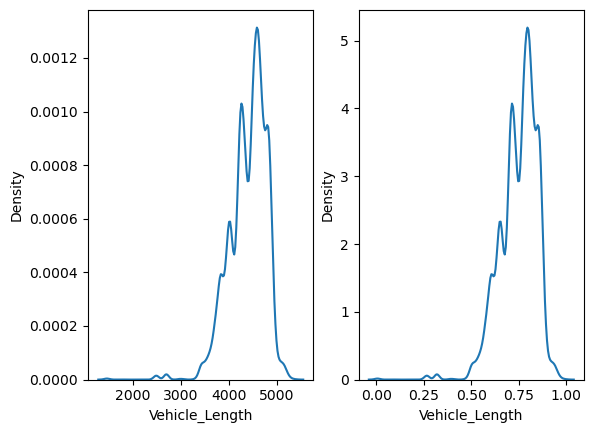

In [64]:
%%time
def normalize_df(df):
    norm_df=df.copy(deep=True)
    for col in norm_df.columns:
        if norm_df[col].dtype =='float64':
            min_val = norm_df[col].min()
            max_val = norm_df[col].max()

            norm_df[col]=(norm_df[col] - min_val) / (max_val - min_val)
    return norm_df

n_df=normalize_df(df2)
print(df2.head())
print(n_df.head())
fig, axs=plt.subplots(ncols=2)
sns.kdeplot(x=df2['Vehicle_Length'], ax=axs[0])
sns.kdeplot(x=n_df['Vehicle_Length'],ax=axs[1])

#### 2.2 Стандартизація

CPU times: total: 1.72 s
Wall time: 325 ms


<Axes: xlabel='Vehicle_Length', ylabel='Density'>

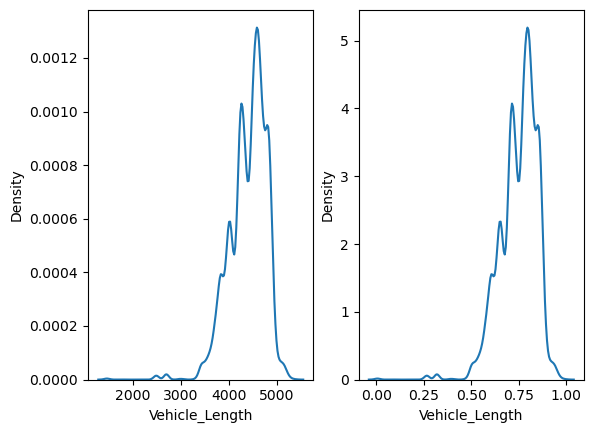

In [65]:
%%time
def standartize_df(df):
    st_df=df.copy(deep=True)
    for col in st_df.columns:
        if st_df[col].dtype =='float64':
            mean_val = st_df[col].mean()
            std_val = st_df[col].std()
            st_df[col]=(st_df[col] - mean_val) / std_val
    return st_df

st_df=standartize_df(df2)
fig, axs=plt.subplots(ncols=2)
sns.kdeplot(x=df2['Vehicle_Length'], ax=axs[0])
sns.kdeplot(x=n_df['Vehicle_Length'],ax=axs[1])

### 3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

CPU times: total: 1.78 s
Wall time: 333 ms


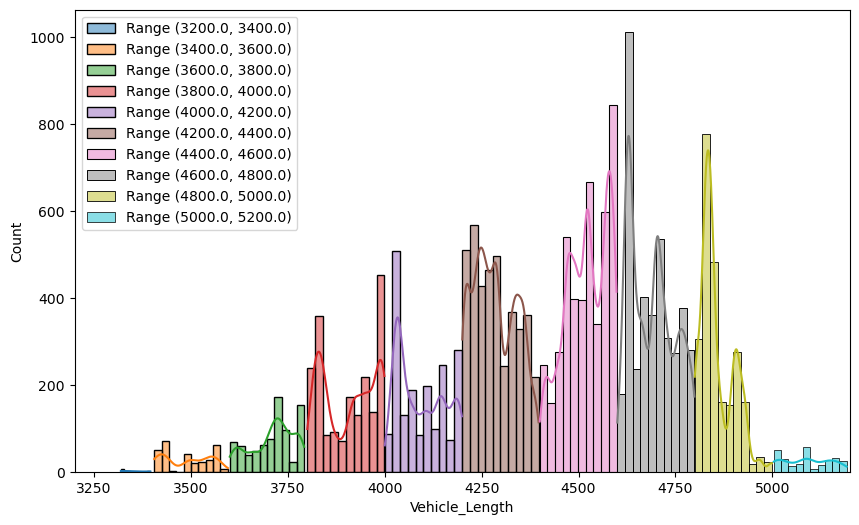

In [66]:
%%time
def histogram(df,col:str,minvalue,maxvalue,rangescount):
    step=(maxvalue-minvalue) / rangescount
    ranges_list=[]
    i=0
    for i in range(rangescount):
        start=round((minvalue + i*step),3)
        end=round((minvalue + (i+1)*step),3)
        ranges_list.append((start,end))
    hist_data = [[] for _ in range(len(ranges_list))]
    
    for value in df[col]:
        for i, (start, end) in enumerate(ranges_list):
            if start <= value < end:
                hist_data[i].append(value)
                break
    
    plt.figure(figsize=(10, 6))
    for i, data in enumerate(hist_data):
        sns.histplot(data, bins=rangescount, kde=True, label=f'Range {ranges_list[i]}')
    plt.legend()
    plt.xlim(minvalue, maxvalue)
    plt.xlabel(col)
histogram(df2,'Vehicle_Length',3200,5200,10)

### 4. Збудувати графік залежності одного integer/real атрибута від іншого.

CPU times: total: 1.19 s
Wall time: 246 ms


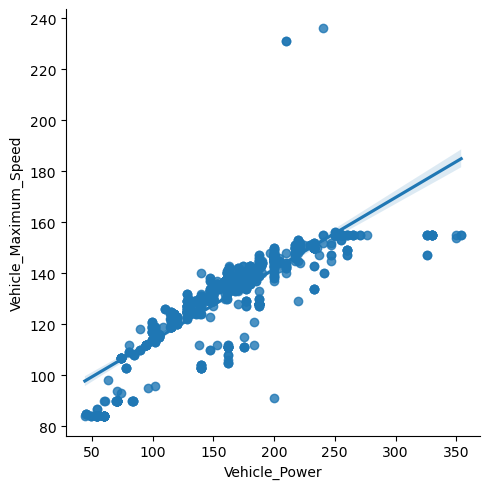

In [67]:
%%time
sns.lmplot(x='Vehicle_Power',y='Vehicle_Maximum_Speed', data=df2.head(1000))

### 5. Підрахувати коефіцієнт Пірсона та Спірсона для двох integer/real атрибутів.

In [68]:
%%time
pearson=scipy.stats.pearsonr(df2['Vehicle_Maximum_Speed'],df2['Vehicle_Power'])[0]
print(f"{pearson=}")
spearson=scipy.stats.spearmanr(df2['Vehicle_Maximum_Speed'],df2['Vehicle_Power'])[0]
print(f"{spearson=}")
spearson2=scipy.stats.spearmanr(df2['Vehicle_Doors'],df2['Vehicle_Power'])[0]
print(f"{spearson2=}")

pearson=0.8358810966525736
spearson=0.8687141149144388
spearson2=-0.10075384968399748
CPU times: total: 0 ns
Wall time: 8 ms


### 6. Провести One Hot Encoding категоріального string атрибуту.

In [69]:
%%time
ohe_df=df2.copy(deep=True)
rd=ohe_df['Vehicle_Fuel'].values.reshape(-1,1)

enc=OneHotEncoder()
enc_data=enc.fit_transform(rd)
enc_df=pd.DataFrame(enc_data.toarray())
enc_df.columns=['Diesel','Petrol']

for i, col in enumerate(enc_df):
    ohe_df.insert(i,col,enc_df[col],True)

ohe_df.sample(10)



CPU times: total: 0 ns
Wall time: 8 ms


,Diesel,Petrol,Vehicle_Model,Start_Year,End_Year,Vehicle_Brand,Vehicle_Doors,Vehicle_Engine_CC,Vehicle_Fuel,Vehicle_Length,Vehicle_Maximum_Speed,Vehicle_MPG,Vehicle_Power,Vehicle_Power_to_Weight_Ratio,Vehicle_Transmission,Price
3743,1.0,0.0,116 D M SPORT,2012,2014,BMW,5.0,1995.0,Diesel,4324.0,124.0,65.7,114.0,86.4,Manual,374.168416
9292,0.0,1.0,ZS+,2003,2005,MG,5.0,1796.0,Petrol,4386.0,122.0,38.7,115.3,104.3,Manual,273.407429
14887,0.0,1.0,LEGACY REN ESTATE,2006,2008,SUBARU,5.0,1994.0,Petrol,4720.0,126.0,31.4,162.3,115.1,Manual,204.103103
19007,0.0,1.0,S80 T SE,2003,2005,VOLVO,4.0,2521.0,Petrol,4822.0,140.0,28.3,206.5,121.7,Automatic,332.152368
50,0.0,1.0,PURE (50),2003,2004,SMART,3.0,698.0,Petrol,2500.0,84.0,60.1,49.6,46.1,Automatic,325.217500
15969,0.0,1.0,ASTRA SRI 16V,2002,2004,VAUXHALL,5.0,2198.0,Petrol,4110.0,133.0,33.6,144.8,117.7,Manual,237.417222
15070,0.0,1.0,ALTO SZ4,2009,2011,SUZUKI,5.0,996.0,Petrol,3500.0,93.0,54.3,68.0,77.3,Automatic,223.787936
7919,0.0,1.0,6 TS2 (147),2007,2010,MAZDA,5.0,1999.0,Petrol,4755.0,126.0,36.7,147.0,143.4,Automatic,316.078286
10813,0.0,1.0,1007 DOLCE (73),2005,2007,PEUGEOT,3.0,1360.0,Petrol,3731.0,103.0,45.6,75.0,59.3,Automatic,297.168542
19026,0.0,1.0,V70 T5 SE ESTATE,2004,2007,VOLVO,5.0,2401.0,Petrol,4710.0,155.0,30.1,246.7,162.5,Manual,376.076667


### 7. Провести візуалізацію багатовимірних даних, використовуючи приклади, наведені у медіумі -https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57.

CPU times: total: 6.48 s
Wall time: 4.12 s


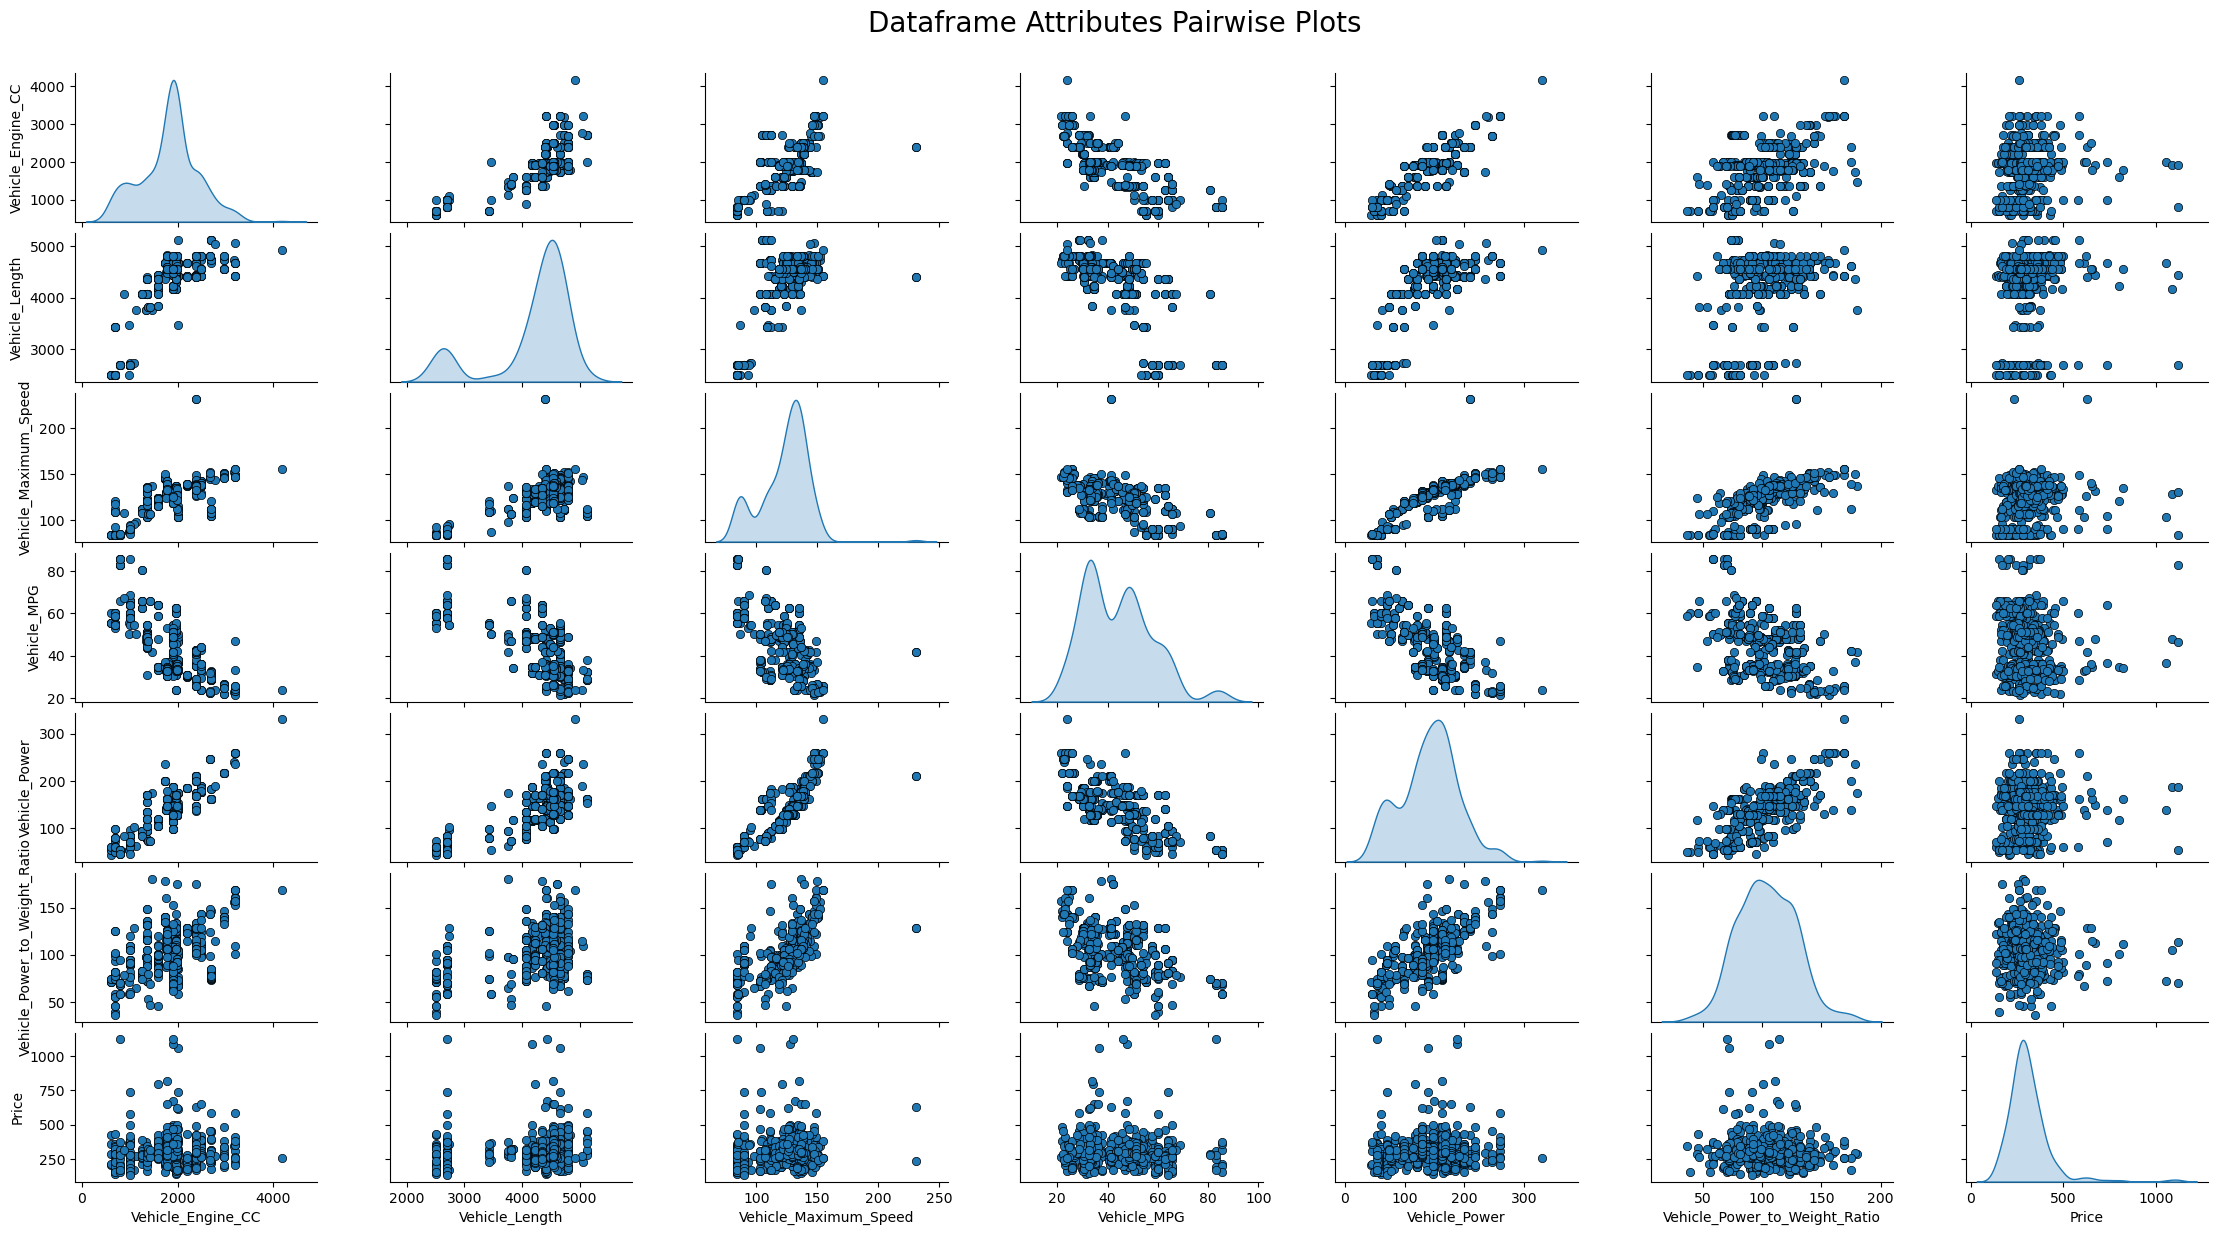

In [70]:
%%time
cols = ['Vehicle_Engine_CC', 'Vehicle_Length', 'Vehicle_Maximum_Speed', 'Vehicle_MPG', 'Vehicle_Power', 'Vehicle_Power_to_Weight_Ratio', 'Price']
pp = sns.pairplot(df2[cols].head(500), height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(fill=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Dataframe Attributes Pairwise Plots', fontsize=20)

## numpy array


Створення numpy array

In [71]:
%%time
tmp=pd.read_excel("Vehicle.xlsx")
tmp.drop(columns=['Vehicle_Years'], inplace=True)


data2np=tmp.to_numpy()
for i in[4,5,7,8,9,10,11,13]:
    data2np[:,i]=data2np[:,i].astype(np.float64)

print(data2np[:10])

[['REXTON RX270 SE CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 4720.0 111.0 30.1 162.3 81.2 'Automatic' 300.27]
 ['REXTON RX270 SX CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 4720.0 111.0 30.1 162.3 75.0 'Manual' 384.105]
 ['REXTON RX270 SX CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 4720.0 111.0 28.5 162.3 146.3 'Automatic' 280.9366666666667]
 ['REXTON RX270 S CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 4720.0 111.0 32.8 162.3 75.0 'Manual' nan]
 ['REXTON RX270 S CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 4720.0 111.0 30.1 162.3 75.0 'Automatic' 285.7133333333333]
 ['RODIUS 270 S CDI ESTATE' 2005 2008.0 'SSANGYONG' 5.0 2696.0 'Diesel'
  5125.0 111.0 28.5 162.3 73.5 'Automatic' 445.605]
 ['RODIUS 270 S CDI ESTATE' 2005 2008.0 'SSANGYONG' 5.0 2696.0 'Diesel'
  5125.0 105.0 32.1 162.3 74.4 'Manual' 394.76666666666665]
 ['RODIUS 270 SE CDI ESTATE' 2005 2008.0 'SSANGYONG' 5.0 2696.0 'Diesel

### 1. Поборотися із зниклими даними

In [79]:
%%time
print("До зміни:")
print(data2np[:, 2][:20])
data2np[pd.isnull(data2np)] = 0
print("\nПісля зміни:")
print(data2np[:, 2][:20])

До зміни:
[2007.0 2007.0 2007.0 2007.0 2007.0 2008.0 2008.0 2008.0 2008.0 2008.0
 2008.0 2008.0 2008.0 2008.0 2008.0 2008.0 2008.0 0 0 0]

Після зміни:
[2007.0 2007.0 2007.0 2007.0 2007.0 2008.0 2008.0 2008.0 2008.0 2008.0
 2008.0 2008.0 2008.0 2008.0 2008.0 2008.0 2008.0 0 0 0]
CPU times: total: 0 ns
Wall time: 12 ms


### 2. Пронормувати вибраний датасет або стандартизувати його (нормалізація і стандартизація мають бути реалізовані як окремі 4 функції без застосування додаткових бібліотек, як наприклад sklearn.preprocessing).

#### 2.1 Нормалізація?


In [80]:
%%time
def normalize_array(arr):
    d_norm=arr.copy()
    for i in[4,5,7,8,9,10,11,13]:
        min_val=np.min(d_norm[:,i])
        max_val=np.max(d_norm[:,i])
        d_norm[:,i]=(d_norm[:,i] - min_val) /(max_val - min_val)
        
    return d_norm

arr_norm=normalize_array(data2np)
print(data2np[:10])
print('\n')
print(arr_norm[:10])

[['REXTON RX270 SE CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 4720.0 111.0 30.1 162.3 81.2 'Automatic' 300.27]
 ['REXTON RX270 SX CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 4720.0 111.0 30.1 162.3 75.0 'Manual' 384.105]
 ['REXTON RX270 SX CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 4720.0 111.0 28.5 162.3 146.3 'Automatic' 280.9366666666667]
 ['REXTON RX270 S CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 4720.0 111.0 32.8 162.3 75.0 'Manual' 0]
 ['REXTON RX270 S CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 4720.0 111.0 30.1 162.3 75.0 'Automatic' 285.7133333333333]
 ['RODIUS 270 S CDI ESTATE' 2005 2008.0 'SSANGYONG' 5.0 2696.0 'Diesel'
  5125.0 111.0 28.5 162.3 73.5 'Automatic' 445.605]
 ['RODIUS 270 S CDI ESTATE' 2005 2008.0 'SSANGYONG' 5.0 2696.0 'Diesel'
  5125.0 105.0 32.1 162.3 74.4 'Manual' 394.76666666666665]
 ['RODIUS 270 SE CDI ESTATE' 2005 2008.0 'SSANGYONG' 5.0 2696.0 'Diesel'


#### 2.2 Стандартизація

In [81]:
%%time
def standart_array(arr):
    st_arr=arr.copy()
    for i in[4,5,7,8,9,10,11,13]:
        mean_val=np.mean(st_arr[:,i])
        std_val=np.std(st_arr[:,i])
        st_arr[:,i]=(st_arr[:,i] - mean_val) / std_val
        
    return st_arr

arr_st=normalize_array(data2np)
print(data2np[:10])
print('\n')
print(arr_st[:10])

[['REXTON RX270 SE CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 4720.0 111.0 30.1 162.3 81.2 'Automatic' 300.27]
 ['REXTON RX270 SX CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 4720.0 111.0 30.1 162.3 75.0 'Manual' 384.105]
 ['REXTON RX270 SX CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 4720.0 111.0 28.5 162.3 146.3 'Automatic' 280.9366666666667]
 ['REXTON RX270 S CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 4720.0 111.0 32.8 162.3 75.0 'Manual' 0]
 ['REXTON RX270 S CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 4720.0 111.0 30.1 162.3 75.0 'Automatic' 285.7133333333333]
 ['RODIUS 270 S CDI ESTATE' 2005 2008.0 'SSANGYONG' 5.0 2696.0 'Diesel'
  5125.0 111.0 28.5 162.3 73.5 'Automatic' 445.605]
 ['RODIUS 270 S CDI ESTATE' 2005 2008.0 'SSANGYONG' 5.0 2696.0 'Diesel'
  5125.0 105.0 32.1 162.3 74.4 'Manual' 394.76666666666665]
 ['RODIUS 270 SE CDI ESTATE' 2005 2008.0 'SSANGYONG' 5.0 2696.0 'Diesel'


### 3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

CPU times: total: 1.89 s
Wall time: 393 ms


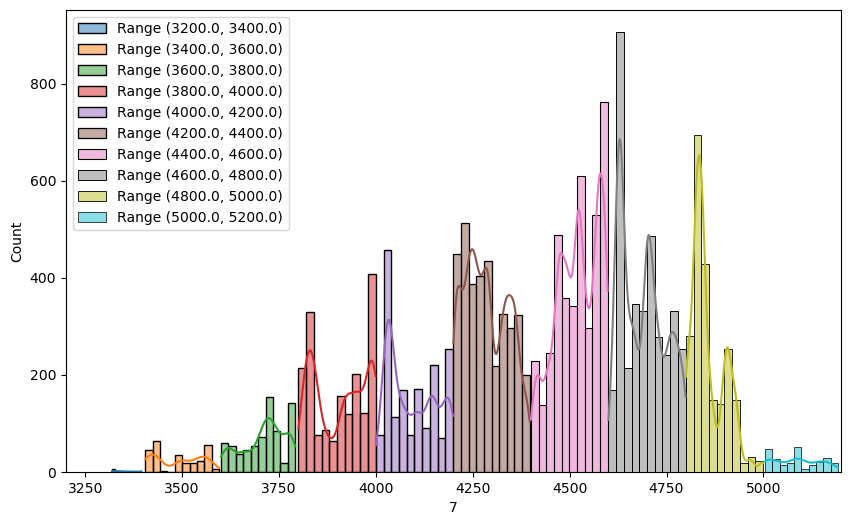

In [75]:
%%time
def histogram(arr,col:int,minvalue,maxvalue,rangescount):
    step=(maxvalue-minvalue) / rangescount
    ranges_list=[]
    i=0
    for i in range(rangescount):
        start=round((minvalue + i*step),3)
        end=round((minvalue + (i+1)*step),3)
        ranges_list.append((start,end))
    hist_data = [[] for _ in range(len(ranges_list))]

    for j in range (arr.shape[0]):
        for i, (start, end) in enumerate(ranges_list):
            if start <= arr[j,col] < end:
                hist_data[i].append(arr[j,col])
                break
    
    plt.figure(figsize=(10, 6))
    for i, data in enumerate(hist_data):
        sns.histplot(data, bins=rangescount, kde=True, label=f'Range {ranges_list[i]}')
    plt.legend()
    plt.xlim(minvalue, maxvalue)
    plt.xlabel(col)
histogram(data2np,7,3200,5200,10)

### 4. Збудувати графік залежності одного integer/real атрибута від іншого.

CPU times: total: 4.3 s
Wall time: 727 ms


<Axes: >

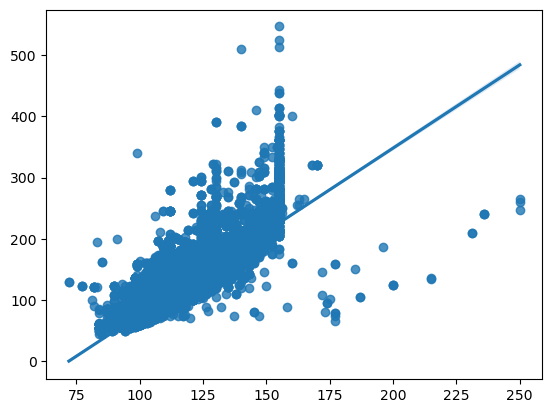

In [91]:
%%time
sns.regplot(x=data2np[:,8].astype(np.float64),y=data2np[:,10].astype(np.float64))

### 5. Підрахувати коефіцієнт Пірсона та Спірсона для двох integer/real атрибутів.

In [76]:
%%time
pearson=scipy.stats.pearsonr(data2np[:,8],data2np[:,10])[0]
print(f"{pearson=}")
spearson=scipy.stats.spearmanr(data2np[:,8],data2np[:,10])[0]
print(f"{spearson=}")
spearson2=scipy.stats.spearmanr(data2np[:,4],data2np[:,10])[0]
print(f"{spearson2=}")

pearson=0.8358810966525736
spearson=0.8687141149144388
spearson2=-0.10075384968399748
CPU times: total: 2.05 s
Wall time: 372 ms


### 6. Провести One Hot Encoding категоріального string атрибуту.

In [77]:
%%time
ohe_arr= data2np.copy()
ard=ohe_arr[:,6].reshape(-1,1)
enc=OneHotEncoder()

enc_data=enc.fit_transform(ard)
# print(enc_data[:50])
enc_arr=enc_data.toarray()

ohe_arr = np.insert(ohe_arr, [7,7], enc_arr, axis=1)
print(ohe_arr[:60])
# print(ohe_arr[1][8])



[['REXTON RX270 SE CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 1.0 0.0 4720.0 111.0 30.1 162.3 81.2 'Automatic' 300.27]
 ['REXTON RX270 SX CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 1.0 0.0 4720.0 111.0 30.1 162.3 75.0 'Manual' 384.105]
 ['REXTON RX270 SX CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 1.0 0.0 4720.0 111.0 28.5 162.3 146.3 'Automatic'
  280.9366666666667]
 ['REXTON RX270 S CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 1.0 0.0 4720.0 111.0 32.8 162.3 75.0 'Manual' 0]
 ['REXTON RX270 S CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 1.0 0.0 4720.0 111.0 30.1 162.3 75.0 'Automatic'
  285.7133333333333]
 ['RODIUS 270 S CDI ESTATE' 2005 2008.0 'SSANGYONG' 5.0 2696.0 'Diesel'
  1.0 0.0 5125.0 111.0 28.5 162.3 73.5 'Automatic' 445.605]
 ['RODIUS 270 S CDI ESTATE' 2005 2008.0 'SSANGYONG' 5.0 2696.0 'Diesel'
  1.0 0.0 5125.0 105.0 32.1 162.3 74.4 'Manual' 394.76666666666665]
 ['RODIUS 270

### 7. Провести візуалізацію багатовимірних даних, використовуючи приклади, наведені у медіумі -https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57.

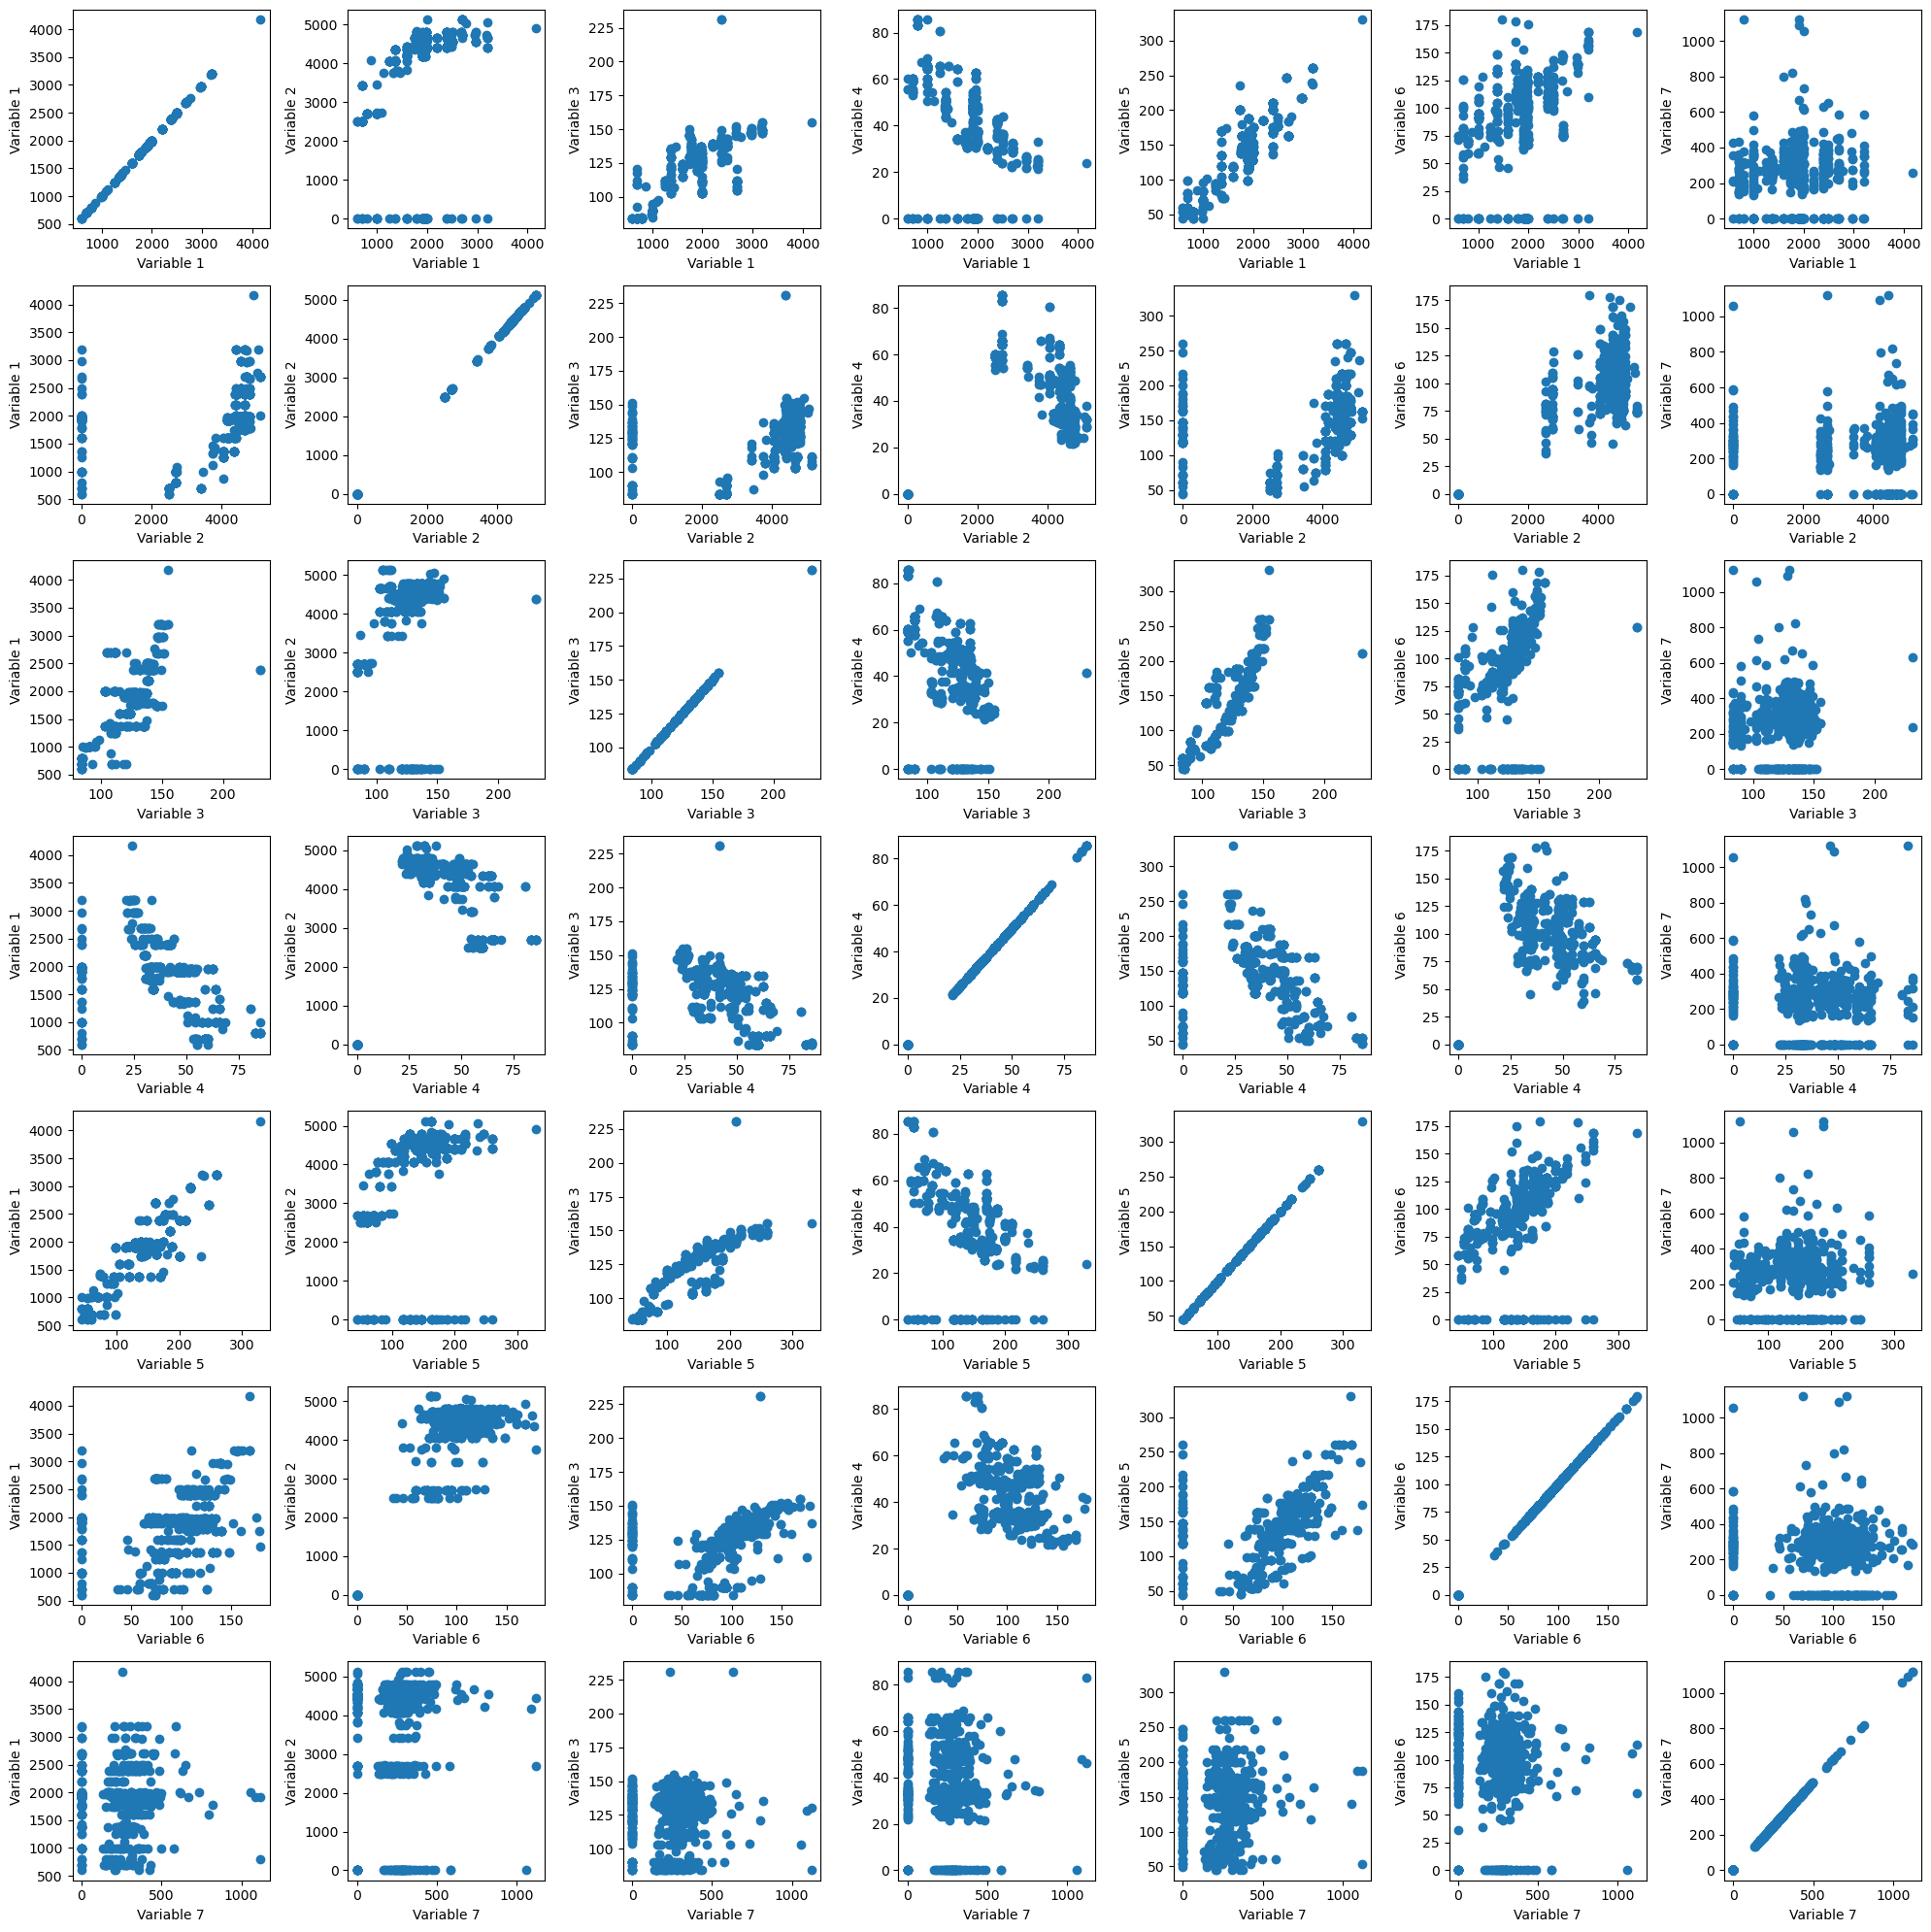

CPU times: total: 5.16 s
Wall time: 4.42 s


In [78]:
%%time
cols= [5, 7, 8, 9, 10, 11, 13]
selected_data = data2np[:, cols]
num_vars = selected_data.shape[1]
fig, axes = plt.subplots(nrows=num_vars, ncols=num_vars, figsize=(20, 20))

for i in range(num_vars):
    for j in range(num_vars):
        axes[i, j].scatter(selected_data[:, i][:500], selected_data[:, j][:500])
        axes[i, j].set_xlabel(f'Variable {i+1}')
        axes[i, j].set_ylabel(f'Variable {j+1}')

plt.tight_layout()
plt.show()

## Таблиця


<table>
    <tr>
        <td rowspan=2>Номер завдання:</td>
        <td>DataFrame</td>
        <td>Numpy array</td>
    </tr>
    <tr>
        <td colspan=2>Швидкість,ms</td>
    </tr>
    <tr>
        <td>1</td>
        <td>9+6.7+8</td>
        <td>12</td>
    </tr>
    <tr>
        <td>2</td>
        <td>340+325</td>
        <td>21+22</td>
    </tr>
    <tr>
        <td>3</td>
        <td>333</td>
        <td>393</td>
    </tr>
    <tr>
        <td>4</td>
        <td>246</td>
        <td>727</td>
    </tr>
    <tr>
        <td>5</td>
        <td>8</td>
        <td>372</td>
    </tr>
    <tr>
        <td>6</td>
        <td>8</td>
        <td>21</td>
    </tr>
    <tr>
        <td>7</td>
        <td>4.12s</td>
        <td>4.42s</td>
    </tr>

</table>